In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import matplotlib 

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

# Reading in the mathematica solution

In [8]:
## Solutions to look at
Spheres = [str(i) for i in range(1)]
Spins = ['0.1']

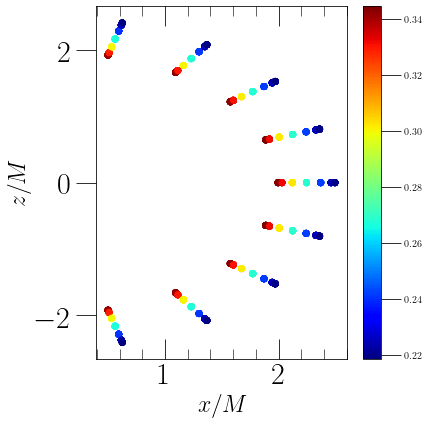

In [21]:
## Now read in the data we have plotted
Spin = '0.1'
xx = []
zz = []
sol = []
for sphere in Spheres:
    X, Z, Solution = np.loadtxt("ScalarField/Theta"+Spin+"/Vars_Sphere"+sphere+".dat", usecols=(0, 1, 2), unpack=True)
    Solution = Solution*-1.0
    xx.extend(X)
    zz.extend(Z)
    sol.extend(Solution)
plt.figure(figsize=(6,6))
plt.scatter(xx,zz,c=sol,cmap='jet')
plt.xlabel(r'$x/M$')
plt.ylabel(r'$z/M$')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=10) 
plt.tight_layout()
plt.show()

# Writing the data to SpEC style h5 file

In [15]:
for spin in Spins:
    for sphere in Spheres:
        InFile = "Domains/Domain"+spin+"/Vars_Sphere"+sphere+".h5"
        OutFile = "ScalarField/Theta"+spin+"/Vars_Sphere"+sphere+".h5"

        fIn = h5py.File(InFile,'r')
        fOut = h5py.File(OutFile, "w")


        ## Setting file attributes
        for att in fIn.attrs.keys():
            fOut.attrs[att] = fIn.attrs[att]

        ## Setting the Extents, TensorDim, TensorSymm, and Time attributes
        grpName = "Field/Step000000"
        grp = fOut.create_group(grpName)
        for att in fIn["X/Step000000"].attrs.keys():
            fOut[grpName].attrs[att] = fIn["X/Step000000"].attrs[att]

        ## Now filling in the data
        f = h5py.File(OutFile, 'r+')
        grp = f[grpName]
        ## Going to take care of the other factors in the code
        ## The interaction terms between the two papers differ by a sign 
        ## -- see Eq. 4 in 1407.2350 (Leo) and Eq. 18.b in 1705.07924 (Masha)
        ######Solution = -4.0*np.loadtxt("MathematicaH5Tests/LeoSolutions/Vars_Sphere"+sphere+".dat", \
        ## usecols=(2), unpack=True)
        Solution = np.loadtxt("ScalarField/Theta"+spin+"/Vars_Sphere"+sphere+".dat", usecols=(2), unpack=True)
        ## Solution also needs a factor of 8 - see
        ## Eq. 21 in (Leo) and Eq. 22 in (Masha)
        ## Note that going from Eq. 18 to Eq. 22 in (Leo) really shows the factor of 8 - whatever solution
        ## to this equation we get, we have to multiply by 8 
        ######Solution = 8.0*Solution
        dataset = grp.create_dataset("scalar", (len(Solution),), dtype='f')
        dataset[...] = Solution

        f.close()
        fIn.close()
        fOut.close()
